<a href="https://colab.research.google.com/github/JencyCS/DataScience/blob/main/Practical_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheth L.U.J and Sir M.V. College

Jency Nadar T095

PCA (Principal Component Analysis)

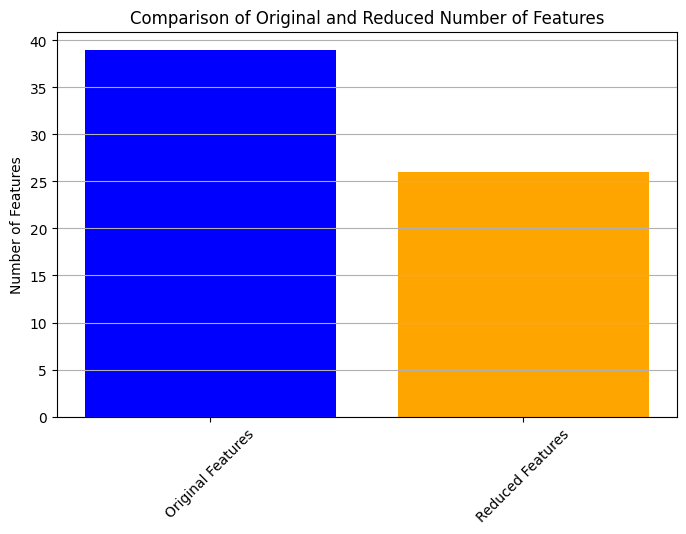

Original number of features:  39
Reduced number of features:  26


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_name = 'Finance_data.csv'
data = pd.read_csv(file_name)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Assuming the last column is the target variable and the rest are features
X = data_encoded.iloc[:, :-1].values
X = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X)

# Get original and reduced feature counts
original_features = X.shape[1]
reduced_features = X_pca.shape[1]

# Plotting the comparison of original and reduced features
plt.figure(figsize=(8, 5))
plt.bar(['Original Features', 'Reduced Features'], [original_features, reduced_features], color=['blue', 'orange'])
plt.title('Comparison of Original and Reduced Number of Features')
plt.ylabel('Number of Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print('Original number of features: ', original_features)
print('Reduced number of features: ', reduced_features)


Reducing Features When Data Is Linearly Inseparable

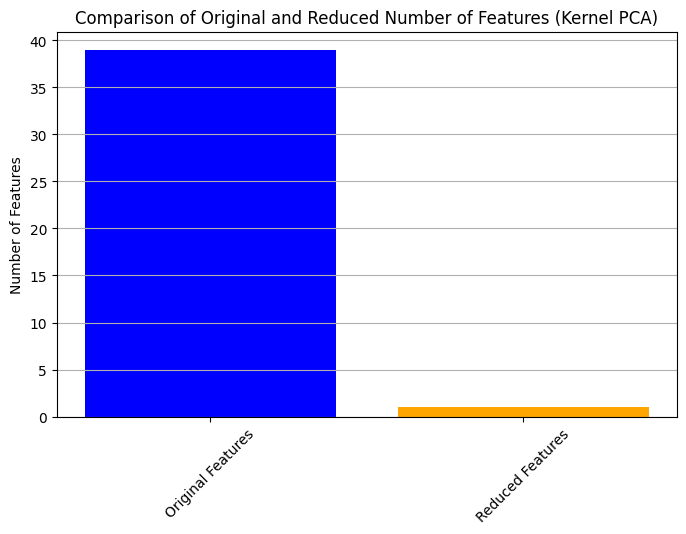

Original number of features: 39
Reduced number of features: 1


In [3]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_name = 'Finance_data.csv'
data = pd.read_csv(file_name)

# Identify categorical columns and apply one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.iloc[:, :-1].values  # Features
X = StandardScaler().fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

# Get original and reduced feature counts
original_features = X.shape[1]
reduced_features = X_kpca.shape[1]

# Plotting the comparison of original and reduced features
plt.figure(figsize=(8, 5))
plt.bar(['Original Features', 'Reduced Features'], [original_features, reduced_features], color=['blue', 'orange'])
plt.title('Comparison of Original and Reduced Number of Features (Kernel PCA)')
plt.ylabel('Number of Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print('Original number of features:', original_features)
print('Reduced number of features:', reduced_features)


Kernel PCA

Reducing Features by Maximizing Class Separability

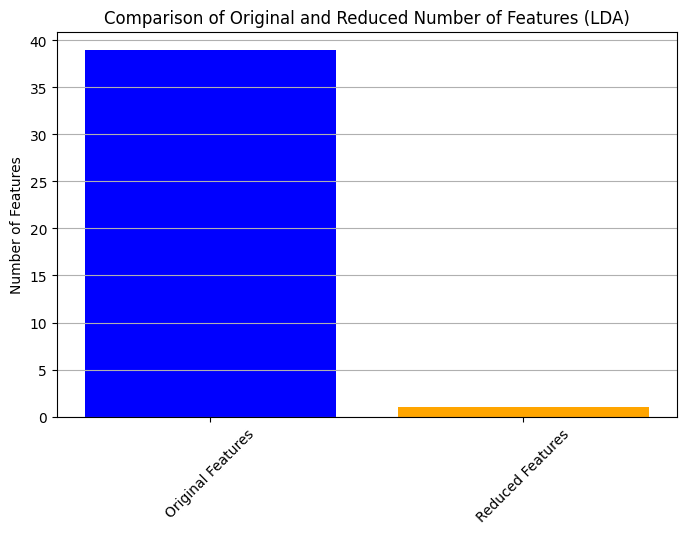

Original number of features: 39
Reduced number of features: 1


In [4]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

file_name = 'Finance_data.csv'
data = pd.read_csv(file_name)

# One-hot encoding of categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.iloc[:, :-1].values  # Features
y = data_encoded.iloc[:, -1].values    # Target variable

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, y).transform(X)

# Get original and reduced feature counts
original_features = X.shape[1]
reduced_features = X_lda.shape[1]

# Plotting the comparison of original and reduced features
plt.figure(figsize=(8, 5))
plt.bar(['Original Features', 'Reduced Features'], [original_features, reduced_features], color=['blue', 'orange'])
plt.title('Comparison of Original and Reduced Number of Features (LDA)')
plt.ylabel('Number of Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print('Original number of features:', original_features)
print('Reduced number of features:', reduced_features)
